# Thinking in tensors, writing in PyTorch

A hands-on course by [Piotr Migdał](https://p.migdal.pl) (2019).

<a href="https://colab.research.google.com/github/stared/thinking-in-tensors-writing-in-pytorch/blob/master/2%20Gradient%20Descent.ipynb" target="_parent">
    <img src="https://colab.research.google.com/assets/colab-badge.svg"/>
</a>

## Notebook 2: Gradient descent

![](https://upload.wikimedia.org/wikipedia/commons/thumb/7/79/Topographic_map_example.png/310px-Topographic_map_example.png)

[Topographic map of Stowe, Vermont from Wikipedia](https://en.wikipedia.org/wiki/Topographic_map)

> X: I want to learn Deep Learning.  
> Me: Do you know what is gradient?  
> X: Yes.  
> Me: Then, it an easy way downhill!

In this notebook, we explore:

* What is gradient?
* What is gradient descent?
* Why does it (sort of) work?

## See also:

* [Gradient Descent Algorithm and Its Variants](https://towardsdatascience.com/gradient-descent-algorithm-and-its-variants-10f652806a3) by Imad Dabbura
* [An overview of gradient descent optimization algorithms](https://ruder.io/optimizing-gradient-descent/) by Sebastian Ruder



In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch

### Parabola

Let's start with something easy, a [parabola](https://en.wikipedia.org/wiki/Parabola):

$$y = x^2$$

If we want to see how the function changes, we can look at its [derivative](https://en.wikipedia.org/wiki/Derivative), i.e. its slope at a given point. It is defined by:

$$ \frac{\partial y}{\partial x} = \lim_{h \to 0} \frac{y(x + h) - y(x)} {h}$$

For $y=x^2$ we can calculate it:

$$\frac{\partial y}{\partial x}
= \lim_{h \to 0} \frac{x^2 + 2 x h + h^2 - x^2}{h}
= \lim_{h \to 0} \left( 2 x + h \right)  = 2x$$

Now, let's see how does it look.

In [2]:
# we approximate with 100 points, from -4 to 4
X = np.linspace(-4, 4, num=100)
Y = X**2

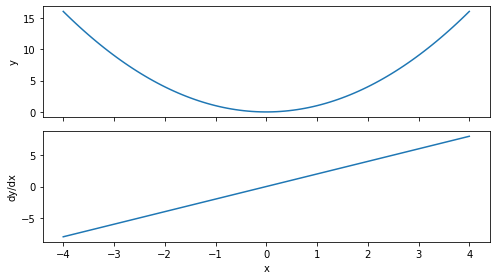

In [3]:
fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1,
                               sharex=True, figsize=(7, 4))

ax0.plot(X, Y)
ax0.set(title='', xlabel='', ylabel='y')

ax1.plot(X, 2 * X)
ax1.set(title='', xlabel='x', ylabel='dy/dx')

fig.tight_layout()

## Numerical derivative in NumPy

If you don't know how to differentiate a function, we can do it numerically by picking a step and dividing the changes of y by the changes of x.

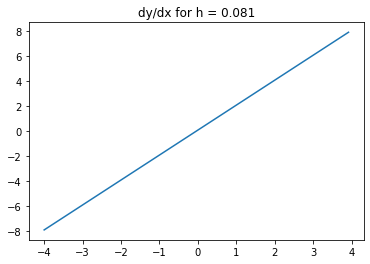

In [4]:
dX = X[1:] - X[:-1]  # np.diff(X)
dY = Y[1:] - Y[:-1]  # np.diff(Y)

plt.plot(X[:-1], dY / dX)
plt.title("dy/dx for h = {:.3f}".format(dX[0]));

## Symbolic derivative in PyTorch

One of the main features of every neural network package is automatic differentiation. 
In PyTorch

In [5]:
x0 = 10.  #@param {type:"number"}

x = torch.tensor(x0, requires_grad=True)
print("    x = {}".format(x))

y = x.pow(2)
print("    y = {}".format(y))

# we calculate derivative of y with respect to everything
y.backward()
print("dy/dx = {}".format(x.grad))

    x = 10.0
    y = 100.0
dy/dx = 20.0


## Gradient descent

[4.0,
 2.4000000953674316,
 1.440000057220459,
 0.8640000224113464,
 0.5184000134468079,
 0.3110399842262268,
 0.18662399053573608,
 0.11197439581155777,
 0.06718464195728302,
 0.04031078517436981,
 0.024186471477150917]

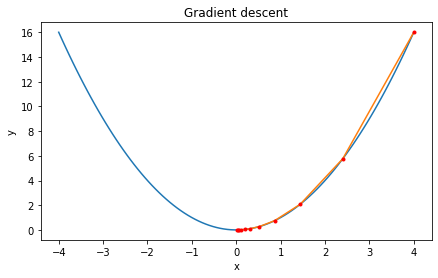

In [6]:
lr = 0.2  #@param {type:"number"}
x0 = 4.   #@param {type:"number"}

xs = [x0]
x = torch.tensor(x0, requires_grad=True)

for i in range(10):
    y = x.pow(2)
    y.backward()
    x.data.add_(- lr * x.grad.data)
    x.grad.data.zero_()
    xs.append(x.item())

# and plotting that
    
points_X = np.array(xs)
points_Y = points_X**2

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 4))
ax.plot(X, Y)
ax.plot(points_X, points_Y, '-')
ax.plot(points_X, points_Y, 'r.')
ax.set(title='Gradient descent', xlabel='x', ylabel='y');
    
xs

## Exercise

Try other learning rates, e.g.:

* 0.1
* 0.5
* 0.75
* 1.
* 1.5
* -0.5

## The exact solution

In the case of $y = x^2$ it is possible to give an exact solution.

We start with a point $x_0$ and with each step, we modify position 

$$ x_{t+1} = x_{t} - \varepsilon \left.\frac{\partial y}{\partial x}\right|_{x=x_t}
= x_{t} - 2 \varepsilon x_{t} = \left( 1 - 2 \varepsilon \right) x_{t} = \left( 1 - 2 \varepsilon \right)^t x_{0} $$

That it is, is a [geometric sequence](https://en.wikipedia.org/wiki/Geometric_progression). They are found in the radioactive decay or contagious infections. Depending on the coefficient, they have a property to decay to zero, or explode. 

If, and only if, $-1 < (1 - 2 \varepsilon) < 1$ then $x_{t}$ converges to zero.

### Questions

* For which learning rate ($\varepsilon$) the position converges to zero?
* If we had another function, e.g. $y = 10 x^2$, would this criterion be the same? (Why? Or why not?)

## Slightly more complicated functions

For $y = x^2$ we know that the lowest value is in 0, and we can easily solve it analytically. But... does this technique work for more complicated functions?

Let's make things complicated, but only a tiny bit.
Calculating derivatives is simple. Though, if you want to do it automatically, for example [with SymPy package](https://docs.sympy.org/latest/tutorial/calculus.html) or online ((https://www.wolframalpha.com/examples/mathematics/calculus-and-analysis/))[with Wolfram Alpha]. Polynomials are the simplest - you can give it a try write $(x+h)^n - x^n$ and see what happens.

In [7]:
def f(x):
    return x - 4 * x**2 + 0.25 * x**4

def df(x):
    return 1 - 8 * x + x**3

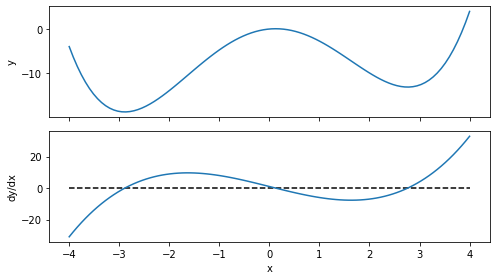

In [8]:
X = np.linspace(-4, 4, num=100)

fig, (ax0, ax1) = plt.subplots(nrows=2, ncols=1,
                               sharex=True, figsize=(7, 4))

ax0.plot(X, f(X))
ax0.set(title='', xlabel='', ylabel='y')

ax1.plot(X, df(X))
ax1.hlines(y=0, xmin=-4, xmax=4, linestyles='dashed')
ax1.set(title='', xlabel='x', ylabel='dy/dx')

fig.tight_layout()

In [9]:
lr = 0.1  #@param {type:"number"}
x0 = 4.   #@param {type:"number"}

xs = [x0]
x = torch.tensor(x0, requires_grad=True)

for i in range(10):
    y = f(x)
    y.backward()
    x.data.add_(- lr * x.grad.data)
    x.grad.data.zero_()
    xs.append(x.item())

xs

[4.0,
 0.7000000476837158,
 1.1257001161575317,
 1.7836114168167114,
 2.5430855751037598,
 2.8328683376312256,
 2.725745677947998,
 2.7811977863311768,
 2.754882574081421,
 2.7680041790008545,
 2.7616050243377686]

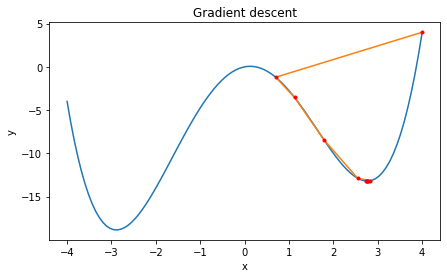

In [10]:
points_X = np.array(xs)
points_Y = f(points_X)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(7, 4))
ax.plot(X, f(X))
ax.plot(points_X, points_Y, '-')
ax.plot(points_X, points_Y, 'r.')
ax.set(title='Gradient descent', xlabel='x', ylabel='y');

## Gradient in 2d

Gradients make sense for more dimensions. For mountains, gradient would be a vector directed along to the biggest slope.



For example, let's have a function:

$$y = g(x_1, x_2) = x_1^2 + \sin(x_2)$$

In this case, gradient is a vector. To calculate gradient we use [partial derivative](https://en.wikipedia.org/wiki/Partial_derivative).

$$\nabla g = \left[ \frac{\partial g}{\partial x_1}, \frac{\partial g}{\partial x_2} \right] = \left[ 2 x_1, \cos(x_2) \right] $$


Gradient symbol:

$$\nabla = \left[ \frac{\partial }{\partial x_1}, \frac{\partial }{\partial x_2} \right]$$

In [11]:
X0_ = np.linspace(-4, 4, num=100)
X1_ = np.linspace(-4, 4, num=100)
X0, X1 = np.meshgrid(X0_, X1_)

In [12]:
# purely technically, so that we have the same code
# for NumPy and PyTorch

def sin(x):
    if type(x) == torch.Tensor:
        return x.sin()
    else:
        return np.sin(x)
    
def cos(x):
    if type(x) == torch.Tensor:
        return x.cos()
    else:
        return np.cos(x)

# now the functions and their gradients
# (calculated by hand)
    
def g(x0, x1):
    return 0.25 * x0**2 + sin(x1)

def dg_dx0(x0, x1):
    return 0.5 * x0

def dg_dx1(x0, x1):
    return cos(x1)

Or, let's draw a [contour plot](https://en.wikipedia.org/wiki/Contour_line), well known from topographic maps.

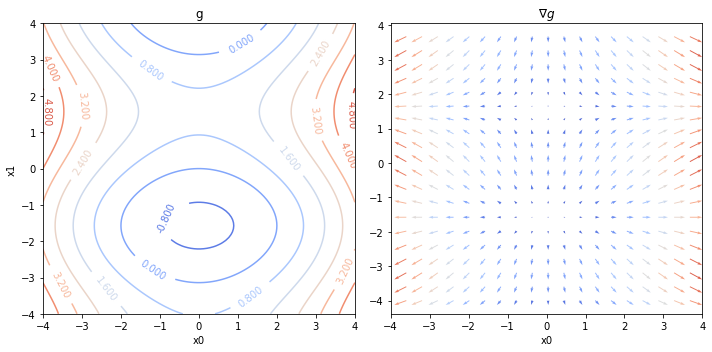

In [13]:
fig, (ax0, ax1) = plt.subplots(nrows=1, ncols=2, figsize=(10, 5),
                               sharex=True)

cs = ax0.contour(X0, X1, g(X0, X1), cmap='coolwarm')
ax0.clabel(cs, inline=1, fontsize=10)
ax0.set_title("g")
ax0.set_xlabel("x0")
ax0.set_ylabel("x1")

X0_less = X0[::5, ::5]
X1_less = X1[::5, ::5]
ax1.set_title(r'$\nabla g$')
ax1.quiver(X0_less, X1_less,
           dg_dx0(X0_less, X1_less), dg_dx1(X0_less, X1_less),
           dg_dx0(X0_less, X1_less)**2 + dg_dx1(X0_less, X1_less)**2,
           units='width', cmap='coolwarm')
ax1.set_xlabel("x0")

fig.tight_layout()


## Gradient descent in 2d

Usually neural networks use more variables than one. For example - millions.
But let's keep it simple and reduce to 2. Gradient works... and much alike water flowing the steepest descent.

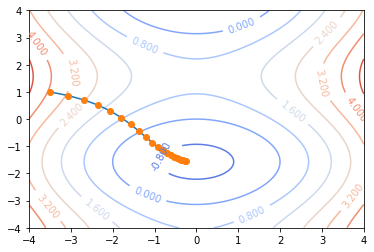

In [14]:
lr = 0.25  #@param {type:"number"}
v = [-3.5, 1.0]

xs = [v[0]]
ys = [v[1]]
v = torch.tensor(v, requires_grad=True)

for i in range(20):
    y = g(v[0], v[1])
    y.backward()
    v.data.add_(- lr * v.grad.data)
    v.grad.data.zero_()
    
    xs.append(v[0].item())
    ys.append(v[1].item())


cs = plt.contour(X0, X1, g(X0, X1), cmap='coolwarm')
plt.clabel(cs, inline=1, fontsize=10)
plt.plot(xs, ys, '-')
plt.plot(xs, ys, 'o')

## More funny stuff

> TIL that changing random stuff until your program works is "hacky" and "bad coding practice" but if you do it fast enough it's "#MachineLearning" and pays 4x your current salary - [@smaine](https://twitter.com/smaine/status/994723834434502658)

From [this tweet by @jebbery](https://twitter.com/jebbery/status/995491957559439360):

![](https://pbs.twimg.com/media/DdCyqMXW4AAZJol?format=jpg)